<a href="https://colab.research.google.com/github/ctshiz/WORKSPACE_STOCK_MARKET_PREDICTION/blob/main/Trading_strategies_with_Relative_Strength_Index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
#Step 1: Determine the installed version of module pandas_datareader
!pip show pandas_datareader
#Step 2: if the version is lower than 0.10.0 then upgrade the version.
!pip install --upgrade pandas_datareader
#Step 3: Don't forget to restart the runtime to load the new libraries.
#Press Runtime->Restart runtime

Name: pandas-datareader
Version: 0.10.0
Summary: Data readers extracted from the pandas codebase,should be compatible with recent pandas versions
Home-page: https://github.com/pydata/pandas-datareader
Author: The PyData Development Team
Author-email: pydata@googlegroups.com
License: BSD License
Location: /usr/local/lib/python3.8/dist-packages
Requires: requests, pandas, lxml
Required-by: 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [47]:
#Step 4: Now try running the step 1 again to determine if the newest version is installed.
!pip show pandas_datareader

Name: pandas-datareader
Version: 0.10.0
Summary: Data readers extracted from the pandas codebase,should be compatible with recent pandas versions
Home-page: https://github.com/pydata/pandas-datareader
Author: The PyData Development Team
Author-email: pydata@googlegroups.com
License: BSD License
Location: /usr/local/lib/python3.8/dist-packages
Requires: pandas, requests, lxml
Required-by: 


In [48]:
#step 5: importing packages
import pandas as pd
import matplotlib.pyplot as plt
import requests
import numpy as np
from math import floor
import seaborn
from datetime import datetime
import pandas_datareader.data as web

In [49]:
#Step-6: Extracting Data from Yahoo Finance
# Now let's define a range, that means, from when until when we want the data:
start_date= datetime(2020, 1, 1) # the format is YYYY-MM-DD
end_date= datetime(2022, 12, 2)
# We will use data from Google and Microsoft in our analysis
banco_brasil= web.DataReader("BBAS3.SA", 'yahoo', start_date, end_date)
banco_brasil = banco_brasil.reset_index()
banco_brasil

,Date,High,Low,Open,Close,Volume,Adj Close
0,2020-01-02,53.970001,53.169998,53.349998,53.799999,13159900.0,45.301125
1,2020-01-03,53.910000,52.849998,53.099998,53.709999,9465400.0,45.225330
2,2020-01-06,53.400002,52.450001,53.400002,53.000000,9999900.0,44.627502
3,2020-01-07,53.029999,52.290001,53.000000,52.599998,10638500.0,44.290688
4,2020-01-08,52.990002,52.040001,52.759998,52.119999,21468600.0,43.886509
...,...,...,...,...,...,...,...
721,2022-11-28,35.200001,34.099998,34.389999,34.830002,8237300.0,34.830002
722,2022-11-29,35.730000,34.590000,35.000000,35.250000,9135200.0,35.250000
723,2022-11-30,35.810001,34.700001,35.419998,35.279999,12799000.0,35.279999
724,2022-12-01,35.560001,34.720001,35.119999,35.240002,9118400.0,35.240002


In [50]:
#step 7: RSI calculation
def get_rsi(close, lookback):
  ret = close.diff()
  up = []
  down = []
  for i in range(len(ret)):
    if ret[i] < 0:
      up.append(0)
      down.append(ret[i])
    else:
      up.append(ret[i])
      down.append(0)
  up_series = pd.Series(up)
  down_series = pd.Series(down).abs()
  up_ewm = up_series.ewm(com = lookback - 1, adjust = False).mean()
  down_ewm = down_series.ewm(com = lookback - 1, adjust = False).mean()
  rs = up_ewm / down_ewm
  rsi = 100 - (100 /(1 + rs))
  rsi_df = pd.DataFrame(rsi).rename(columns={0:'RSI'}).set_index(close.index)
  rsi_df = rsi_df.dropna()
  return rsi_df[3:]

In [51]:
banco_brasil['rsi_14'] = get_rsi(banco_brasil['Close'], 14)
banco_brasil = banco_brasil.dropna()
banco_brasil

,Date,High,Low,Open,Close,Volume,Adj Close,rsi_14
4,2020-01-08,52.990002,52.040001,52.759998,52.119999,21468600.0,43.886509,0.000000
5,2020-01-09,52.330002,50.730000,52.200001,51.060001,24743000.0,42.993954,0.000000
6,2020-01-10,51.439999,49.560001,51.160000,49.860001,15348200.0,41.983524,0.000000
7,2020-01-13,50.500000,49.610001,49.980000,50.419998,14181900.0,42.455063,14.668015
8,2020-01-14,50.490002,49.750000,50.279999,50.150002,8765000.0,42.227715,13.629954
...,...,...,...,...,...,...,...,...
721,2022-11-28,35.200001,34.099998,34.389999,34.830002,8237300.0,34.830002,41.353815
722,2022-11-29,35.730000,34.590000,35.000000,35.250000,9135200.0,35.250000,43.582274
723,2022-11-30,35.810001,34.700001,35.419998,35.279999,12799000.0,35.279999,43.746694
724,2022-12-01,35.560001,34.720001,35.119999,35.240002,9118400.0,35.240002,43.564396


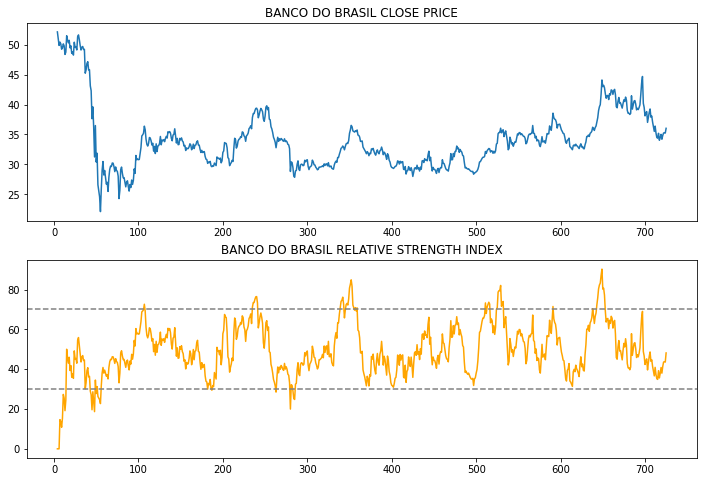

In [52]:
#step 8: rsi plot
fig,axs=plt.subplots(2, figsize=(12,8))
axs[0].plot(banco_brasil['Close'],linewidth=1.5)
axs[0].set_title('BANCO DO BRASIL CLOSE PRICE')
axs[1].plot(banco_brasil['rsi_14'],linewidth=1.5, color='orange')
axs[1].axhline(30, linestyle ='--',linewidth=1.5, color='grey')
axs[1].axhline(70, linestyle ='--',linewidth=1.5, color='grey')
axs[1].set_title('BANCO DO BRASIL RELATIVE STRENGTH INDEX')
plt.show()

In [53]:
#step 9: creating the trading strategy
def implement_rsi_strategy(prices, rsi):
  buy_price = []
  sell_price = []
  rsi_signal = []
  signal = 0

  for i in range(len(rsi)):
    if rsi[i-1] > 30 and rsi[i] < 30:
      if signal != 1:
        buy_price.append(prices[i])
        sell_price.append(np.nan)
        signal = 1
        rsi_signal.append(signal)
      else:
        buy_price.append(np.nan)
        sell_price.append(np.nan)
        rsi_signal.append(0)
    elif rsi[i-1] < 70 and rsi[i] > 70:
      if signal != -1:
        buy_price.append(np.nan)
        sell_price.append(prices[i])
        signal = -1
        rsi_signal.append(signal)
      else:
        buy_price.append(np.nan)
        sell_price.append(np.nan)
        rsi_signal.append(0)
    else:
      buy_price.append(np.nan)
      sell_price.append(np.nan)
      rsi_signal.append(0)
  return buy_price, sell_price, rsi_signal

rsi = banco_brasil['rsi_14'].to_list()
prices = banco_brasil['Close'].to_list()
buy_price, sell_price, rsi_signal = implement_rsi_strategy(prices,rsi)
      

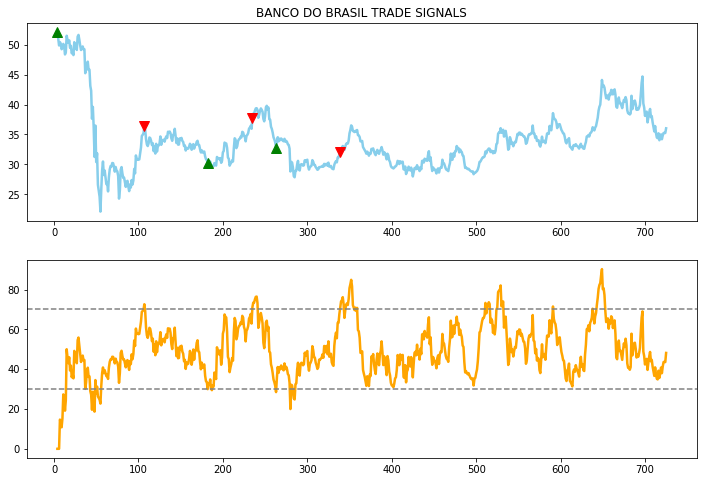

In [54]:
fig,axs=plt.subplots(2, figsize=(12,8))
axs[0].set_title('BANCO DO BRASIL TRADE SIGNALS')
axs[0].plot(banco_brasil['Close'],linewidth=2.5, color='skyblue',label='BANCO DO BRASIL')
axs[0].plot(banco_brasil.index, buy_price, marker='^', markersize=10,color='green',label='BUY SIGNAL')
axs[0].plot(banco_brasil.index, sell_price, marker='v', markersize=10,color='r',label='SELL SIGNAL')
axs[1].plot(banco_brasil['rsi_14'],linewidth=2.5, color='orange')
axs[1].axhline(30, linestyle ='--',linewidth=1.5, color='grey')
axs[1].axhline(70, linestyle ='--',linewidth=1.5, color='grey')
plt.show()


In [55]:
#step 10: create the position
position = []
for i in range(len(rsi_signal)):
  if rsi_signal[i] > 1:
    position.append(0)
  else:
    position.append(1)

for i in range(len(banco_brasil['Close'])):
  if rsi_signal[i] == 1:
    position[i] = 1
  elif rsi_signal[i] == -1:
    position[i] = 0
  else:
    position[i] = position[i-1]

rsi = banco_brasil['rsi_14']
close_price = banco_brasil['Close']
rsi_signal = pd.DataFrame(rsi_signal).rename(columns={0:'rsi_signal'}).set_index(banco_brasil.index)
position = pd.DataFrame(position).rename(columns={0:'rsi_position'}).set_index(banco_brasil.index)

frames = [close_price, rsi, rsi_signal, position]
strategy = pd.concat(frames, join='inner', axis=1)
strategy.head()

,Close,rsi_14,rsi_signal,rsi_position
4,52.119999,0.000000,1,1
5,51.060001,0.000000,0,1
6,49.860001,0.000000,0,1
7,50.419998,14.668015,0,1
8,50.150002,13.629954,0,1


In [56]:
#step 11: backtesting
banco_ret = pd.DataFrame(np.diff(banco_brasil['Close'])).rename(columns={0:'returns'})
rsi_strategy_ret = []

banco_ret1 = banco_ret['returns'].to_list()
strategy1 = strategy['rsi_position'].to_list()

for i in range(len(banco_ret)):
  returns = banco_ret1[i]*strategy1[i]
  rsi_strategy_ret.append(returns)

rsi_strategy_ret_df = pd.DataFrame(rsi_strategy_ret).rename(columns={0:'rsi_returns'})
investment_value = 100000
number_of_stocks = floor(investment_value/banco_brasil['Close'].to_list()[-1])
rsi_investment_ret = []

for i in range(len(rsi_strategy_ret_df['rsi_returns'])):
  returns = number_of_stocks*rsi_strategy_ret_df['rsi_returns'][i]
  rsi_investment_ret.append(returns)

rsi_investment_ret_df = pd.DataFrame(rsi_investment_ret).rename(columns={0:'investment_returns'})
total_investment_ret = round(sum(rsi_investment_ret_df['investment_returns']), 2)
profil_percentage = floor((total_investment_ret/investment_value)*100)
print('Profit gained from the RSI strategy by investing $100k in BBAS3:')
print(total_investment_ret)
print('Profit percentage of the RSI strategy:')
print(profil_percentage)

Profit gained from the RSI strategy by investing $100k in BBAS3:
-24197.99
Profit percentage of the RSI strategy:
-25
